In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('./archive/creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

<AxesSubplot:>

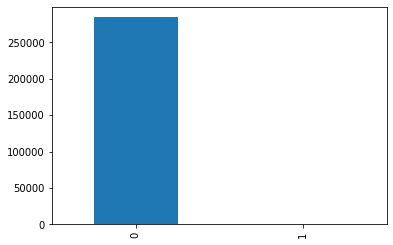

In [7]:
pd.value_counts(df['Class']).plot.bar()

In [8]:
len(df.columns)

31

In [9]:
# Simple ANN to solve and check the accuracy

In [10]:
x = df.iloc[:,1:30]
y = df.iloc[:,-1]

In [13]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42, stratify=y)

In [17]:
y_train.value_counts()

0    199020
1       344
Name: Class, dtype: int64

In [18]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [20]:
n_inputs = len(x.columns)

In [21]:
# model simple ann
model = Sequential()
model.add(Dense(50, input_dim = n_inputs, activation='relu', kernel_initializer = 'he_uniform'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy')
model.fit(X_train, y_train, epochs=15)

Epoch 1/15
6231/6231 [==============================] - 12s 2ms/step - loss: 0.0201
Epoch 2/15
6231/6231 [==============================] - 11s 2ms/step - loss: 0.0146
Epoch 3/15
6231/6231 [==============================] - 11s 2ms/step - loss: 0.0099
Epoch 4/15
6231/6231 [==============================] - 11s 2ms/step - loss: 0.0098
Epoch 5/15
6231/6231 [==============================] - 11s 2ms/step - loss: 0.0075
Epoch 6/15
6231/6231 [==============================] - 11s 2ms/step - loss: 0.0092
Epoch 7/15
6231/6231 [==============================] - 11s 2ms/step - loss: 0.0093
Epoch 8/15
6231/6231 [==============================] - 11s 2ms/step - loss: 0.0088
Epoch 9/15
6231/6231 [==============================] - 11s 2ms/step - loss: 0.0085
Epoch 10/15
6231/6231 [==============================] - 11s 2ms/step - loss: 0.0083
Epoch 11/15
6231/6231 [==============================] - 12s 2ms/step - loss: 0.0066
Epoch 12/15
6231/6231 [==============================] - 11s 2ms/step - lo

In [22]:
from sklearn.metrics import roc_auc_score
y_pred = model.predict(X_test)

roc_auc_score(y_test,y_pred)

0.9215936582575892

In [23]:
# Using weighted neural network with keras

In [24]:
weights_assigned = {0:1,1:570}

In [25]:
# model - weighted neural network with keras ann
model = Sequential()
model.add(Dense(50, input_dim = n_inputs, activation='relu', kernel_initializer = 'he_uniform'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy')
model.fit(X_train, y_train, epochs=10, class_weight=weights_assigned)

Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.
Epoch 1/10
6231/6231 [==============================] - 13s 2ms/step - loss: 0.5830
Epoch 2/10
6231/6231 [==============================] - 12s 2ms/step - loss: 0.3046
Epoch 3/10
6231/6231 [==============================] - 13s 2ms/step - loss: 0.2378
Epoch 4/10
6231/6231 [==============================] - 13s 2ms/step - loss: 0.2385
Epoch 5/10
6231/6231 [==============================] - 12s 2ms/step - loss: 0.2527
Epoch 6/10
6231/6231 [==============================] - 12s 2ms/step - loss: 0.1913
Epoch 7/10
6231/6231 [==============================] - 13s 2ms/step - loss: 0.2419
Epoch 8/10
6231/6231 [==============================] - 13s 2ms/step - loss: 0.1877
Epoch 9/10
6231/6231 [==============================] - 13s 2ms/step - loss: 0.2236
Epoch 10/10
6231/6231 [==============================] - 13s 2ms/step - loss: 0.1954


In [26]:
y_pred = model.predict(X_test)

In [27]:
roc_auc_score(y_test, y_pred)

0.9347450343244352